<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%208/GAN_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


**# 1. Dataset**

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 29.2MB/s]


**# 2. Generator**

In [4]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, output_dim=28*28):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    def forward(self, z):
        return self.model(z)



# **3. Discriminator**


In [5]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)


#**4. Inisialisasi**

In [6]:
z_dim = 100
generator = Generator(z_dim, 28*28)
discriminator = Discriminator(28*28)
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)


# **5. Training Loop**


In [8]:
epochs = 30
for epoch in range(epochs):
    for real, _ in dataloader:
        batch_size = real.size(0)
        real = real.view(batch_size, -1)

        # Label
        real_label = torch.ones(batch_size, 1)
        fake_label = torch.zeros(batch_size, 1)

        # --- Train Discriminator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)

        real_loss = criterion(discriminator(real), real_label)
        fake_loss = criterion(discriminator(fake.detach()), fake_label)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)
        g_loss = criterion(discriminator(fake), real_label)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/30] | D Loss: 0.6724 | G Loss: 1.2225
Epoch [2/30] | D Loss: 0.4089 | G Loss: 1.9029
Epoch [3/30] | D Loss: 0.0318 | G Loss: 4.5638
Epoch [4/30] | D Loss: 0.0282 | G Loss: 4.1772
Epoch [5/30] | D Loss: 0.0024 | G Loss: 6.3888
Epoch [6/30] | D Loss: 0.0004 | G Loss: 8.6066
Epoch [7/30] | D Loss: 0.0014 | G Loss: 7.3865
Epoch [8/30] | D Loss: 0.0003 | G Loss: 9.2579
Epoch [9/30] | D Loss: 0.0001 | G Loss: 10.3459
Epoch [10/30] | D Loss: 0.0000 | G Loss: 11.1385
Epoch [11/30] | D Loss: 0.0010 | G Loss: 6.9814
Epoch [12/30] | D Loss: 0.0000 | G Loss: 10.8397
Epoch [13/30] | D Loss: 0.0000 | G Loss: 10.7939
Epoch [14/30] | D Loss: 0.0000 | G Loss: 12.3151
Epoch [15/30] | D Loss: 0.0000 | G Loss: 13.4119
Epoch [16/30] | D Loss: 0.0000 | G Loss: 10.9585
Epoch [17/30] | D Loss: 0.0000 | G Loss: 16.7416
Epoch [18/30] | D Loss: 0.0000 | G Loss: 16.2366
Epoch [19/30] | D Loss: 0.0000 | G Loss: 16.1723
Epoch [20/30] | D Loss: 0.0000 | G Loss: 12.1362
Epoch [21/30] | D Loss: 0.0001 | G Los

# **6. Visualisasi hasil**

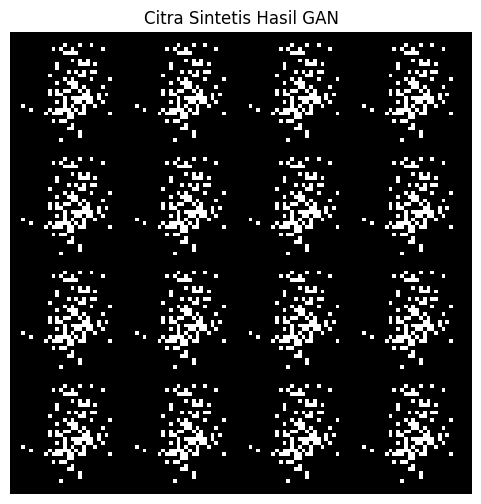

In [9]:

with torch.no_grad():
    z = torch.randn(16, z_dim)
    fake_images = generator(z).view(-1, 1, 28, 28)
    grid = make_grid(fake_images, nrow=4, normalize=True)
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title("Citra Sintetis Hasil GAN")
    plt.axis('off')
    plt.show()
